interactive(children=(FloatSlider(value=20.0, description='cena_czekolady_slider', max=50.0, style=SliderStyle…

<function __main__.hurtowa_Produkcja_czekolady(cena_czekolady=20, cena_karmelu=15, cena_oleju=7, cena_orzechow=20, cena_cukru=4, zysk_z_snickers=105, zysk_z_mars=100, zuzycie_czekolady_mars=0.5, zuzycie_karmelu_mars=0.2, zuzycie_cukru_mars=0.3, zuzycie_olej_mars=0.05, zuzycie_czekolady_snickers=0.4, zuzycie_karmelu_snickers=0.2, zuzycie_cukru_snickers=0.3, zuzycie_olej_snickers=0.05, zuzycie_orzechow_snickers=0.2, maksimum_czekolady=6000, maksimum_orzechy=2000)>

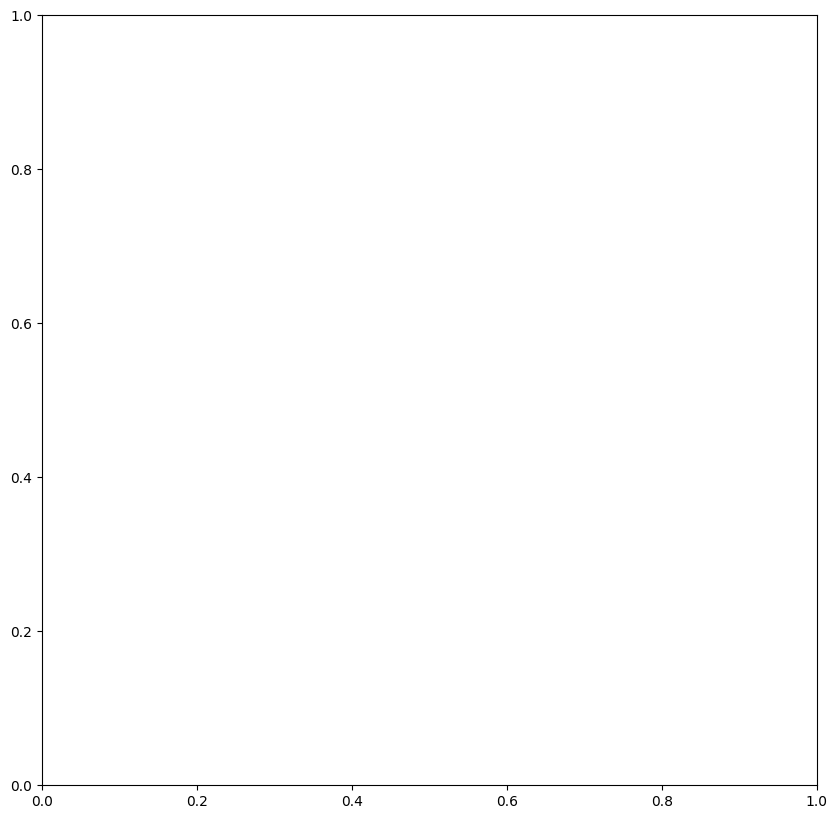

In [ ]:
!pip install pulp# Instalacja biblioteki Pulp (rozwiązywanie problemów optymalizacyjnych)
from pulp import *# Importowanie biblioteki Pulp (do programowania liniowego) oraz Pandas (do manipulacji danymi)
import pandas as pd

?? interact
# Importowanie widgetów interaktywnych do obsługi suwaków i interfejsów w Jupyter Notebook

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import ipywidgets as widgets
import pandas as pd

style = {'description_width': 'initial'}# Stylizacja opisów widgetów, aby były lepiej czytelne

# Tworzenie suwaków do określania cen składników
# Definiowanie zakresu minimalnej, maksymalnej wartości oraz wartości początkowej
cena_czekolady_slider = FloatSlider(min=0,max = 50, value= 20,
description="cena_czekolady_slider", style= style )
cena_karmelu_slider = FloatSlider(min=0,max = 50, value= 15,
description="cena_karmelu_slider", style= style )
cena_oleju_slider = FloatSlider(min=0,max = 20, value= 7,
description="cena_oleju_slider", style= style )
cena_orzechow_slider = FloatSlider(min=0,max = 50, value= 20,
description="cena_orzechow_slider", style= style )
cena_cukru_slider = FloatSlider(min=0,max = 20, value= 4,
description="cena_cukru_slider", style= style )

# Tworzenie suwaków do określania zysków ze sprzedaży różnych produktów
zysk_z_snickers_slider = FloatSlider(min=0,max = 1000, value= 105,
description="zysk_z_snickers_slider", style= style )
zysk_z_mars_slider = FloatSlider(min=0,max = 1000, value= 100,
description="zysk_z_mars_slider", style= style )

# Suwaki określające zużycie składników przez Mars
zuzycie_czekolady_mars_slider = FloatSlider(min=0,max = 1,value= 0.5,
description="zuzycie_czekolady_mars_slider", style= style )
zuzycie_karmelu_mars_slider = FloatSlider(min=0,max = 1,value= 0.2,
description="zuzycie_karmelu_mars_slider", style= style )
zuzycie_cukru_mars_slider = FloatSlider(min=0,max = 1,value= 0.3,
description="zuzycie_cukru_mars_slider", style= style )
zuzycie_olej_mars_slider = FloatSlider(min=0,max = 1,value= 0.05,
description="zuzycie_olej_mars_slider", style= style )

# Suwaki określające zużycie składników przez Snickers
zuzycie_czekolady_snickers_slider = FloatSlider(min=0,max = 1,value= 0.4,
description="zuzycie_czekolady_snickers_slider", style= style )
zuzycie_karmelu_snickers_slider = FloatSlider(min=0,max = 1,value= 0.2,
description="zuzycie_karmelu_snickers_slider", style= style )
zuzycie_cukru_snickers_slider = FloatSlider(min=0,max = 1,value= 0.3,
description="zuzycie_cukru_snickers_slider", style= style )
zuzycie_olej_snickers_slider = FloatSlider(min=0,max = 1,value= 0.05,
description="zuzycie_olej_snickers_slider", style= style )
zuzycie_orzechow_snickers_slider = FloatSlider(min=0,max = 1,value= 0.2,
description="zuzycie_orzechow_snickers_slider", style= style )

# Suwaki do określenia maksymalnych dostępnych zasobów czekolady i orzechów
maksimum_czekolady_slider = IntSlider(min=0,max = 20000,value= 6000,
description="maksimum_czekolady_slider", style= style )
maksimum_orzechy_slider = FloatSlider(min=0,max = 10000,value= 2000,
description="maksimum_orzechy_slider", style= style )

# Definiowanie funkcji optymalizacyjnej, która oblicza najlepszą produkcję
def hurtowa_Produkcja_czekolady (
cena_czekolady = 20,
cena_karmelu = 15,
cena_oleju = 7,
cena_orzechow = 20,
cena_cukru = 4,
zysk_z_snickers = 105,
zysk_z_mars = 100,
zuzycie_czekolady_mars = 0.5,
zuzycie_karmelu_mars = 0.2,
zuzycie_cukru_mars = 0.3,
zuzycie_olej_mars = 0.05,
zuzycie_czekolady_snickers = 0.4,
zuzycie_karmelu_snickers = 0.2,
zuzycie_cukru_snickers = 0.3,
zuzycie_olej_snickers = 0.05,
zuzycie_orzechow_snickers = 0.2,
maksimum_czekolady = 6000,
maksimum_orzechy = 2000
):
  # Tworzenie problemu optymalizacji liniowej z celem maksymalizacji zysków
  prob = LpProblem("Najlepsza_Produkcja", LpMaximize)

  # Definiowanie zmiennych decyzyjnych (ilości produktów)
  m=LpVariable("Ile kg marsa", lowBound=0, cat='None')
  s=LpVariable("Ile kg snickers", lowBound=0, cat='None')
  o=LpVariable("Ile kg orzechow", lowBound=0, cat='None')
  c=LpVariable("Ile kg czekolady", lowBound=0, cat='None')
  # Obliczenie kosztów poszczególnych składników oraz zysków
  c=zuzycie_czekolady_mars*m+zuzycie_czekolady_snickers*s
  o=zuzycie_orzechow_snickers*s
  czekolada=cena_czekolady*c
  karmel=cena_karmelu*zuzycie_karmelu_mars*m+zuzycie_karmelu_snickers*s
  olej=cena_oleju*zuzycie_olej_mars*m+zuzycie_olej_snickers*s
  orzech=cena_orzechow*o
  cukier=cena_cukru*zuzycie_cukru_mars*m+cena_cukru*zuzycie_cukru_snickers*s

 # Dodanie funkcji celu (zyski pomniejszone o koszty składników)
  prob += (zysk_z_mars*m+zysk_z_snickers*s-czekolada-karmel-olej-orzech-cukier)

  # Dodanie ograniczeń dotyczących maksymalnych zasobów
  prob += (c<=maksimum_czekolady)
  prob += (o<=maksimum_orzechy)
  prob.solve()    # Rozwiązanie problemu
  print("Status:", LpStatus[prob.status])  # Wyświetlenie wyników i zysków
    # Wyświetlenie wartości zmiennych decyzyjnych
  for v in prob.variables():
        print(v.name, "=", v.varValue)
          # Wyświetlenie maksymalnego zysku
  print("Zysk wyniesie {} zł  ".format(value(prob.objective)))
  # Obliczenie (shadow prices) i wartości "slack" dla ograniczeń
  shadows = [{'name':name, 'shadow price': c.pi, "slack": c.slack}
for name, c in prob.constraints.items()]
# Wydrukowanie tabeli z wartościami Shadow Price i Slack dla ograniczeń
  print("*"*10+"Shadow Prices"+"*"*10)
  print(pd.DataFrame(shadows))

# Import dodatkowych bibliotek do wykresów
  from ipywidgets import IntSlider
  import numpy as np
  import matplotlib.pyplot as plt
  %matplotlib inline

  # Jeśli rozwiązanie optymalne zostało znalezione, analizujemy wpływ zmiany zużycia karmelu na zysk
  if LpStatus[prob.status] == "Optimal":
    # Tworzymy zakres wartości zużycia karmelu przez Marsa
   zuzycie_karmelu_mars_slider=np.linspace(10,  1, 20)
   zysk=[]
   for ZUZYCIE in zuzycie_karmelu_mars_slider:   # Iteracja przez różne wartości zużycia karmelu

       # Tworzymy nowy problem optymalizacyjny dla każdej wartości zużycia karmelu
    prob_graph = LpProblem("Najlepsza_Produkcja", LpMaximize)
      # Definiujemy zmienne decyzyjne
    m=LpVariable("Ile kg marsa", lowBound=0, cat='None')
    s=LpVariable("Ile kg snickers", lowBound=0, cat='None')
    o=LpVariable("Ile kg orzechow", lowBound=0, cat='None')
    c=LpVariable("Ile kg czekolady", lowBound=0, cat='None')
     # Definiujemy zużycie składników
    c=zuzycie_czekolady_mars*m+zuzycie_czekolady_snickers*s
    o=zuzycie_orzechow_snickers*s
       # Koszty składników
    czekolada=cena_czekolady*c
    karmel=cena_karmelu*ZUZYCIE*m+zuzycie_karmelu_snickers*s
    olej=cena_oleju*zuzycie_olej_mars*m+cena_oleju*zuzycie_olej_snickers*s
    orzech=cena_orzechow*o
    cukier=cena_cukru*zuzycie_cukru_mars*m+cena_cukru*zuzycie_cukru_snickers*s
        # Maksymalizujemy zysk
    prob_graph += (zysk_z_mars*m+zysk_z_snickers*s-czekolada-karmel-olej-orzech-cukier)
     # Dodajemy ograniczenia na ilość dostępnych składników
    prob_graph += (c<=maksimum_czekolady)
    prob_graph += (o<=maksimum_orzechy)
    prob_graph.solve()     # Rozwiązujemy nowy problem optymalizacyjny

    # Jeśli rozwiązanie jest optymalne, zapisujemy wartość zysku
    if LpStatus[prob_graph.status] == "Optimal":
      zysk.append(value(prob_graph.objective))
    else:
      zysk.append(0)  # Jeśli brak optymalnego rozwiązania, zapisujemy 0
         # Tworzymy wykres zależności zysku od zużycia karmelu przez Marsa
   plt.figure(figsize=(10,10))
   plt.plot(zuzycie_karmelu_mars,zysk)
   plt.xlabel("Zuzycie kamelu_mars (kg)")
   plt.ylabel("Zysk (zł)")
   plt.title("Wpływ zuzycie_karmelu_mars na zysk")
   plt.grid(True)
   plt.show()
  else:
    print(f"Rozwiązanie nie jest optymalne. Status: {LpStatus[prob.status]}")

    # Tworzenie interaktywnego panelu sterowania dla suwaków
interact(hurtowa_Produkcja_czekolady,
         cena_czekolady=cena_czekolady_slider,
         cena_karmelu=cena_karmelu_slider,
         cena_oleju=cena_oleju_slider,
         cena_orzechow=cena_orzechow_slider,
         cena_cukru=cena_cukru_slider,
         zysk_z_snickers=zysk_z_snickers_slider,
         zysk_z_mars=zysk_z_mars_slider,
         zuzycie_czekolady_mars=zuzycie_czekolady_mars_slider,
         zuzycie_karmelu_mars=zuzycie_karmelu_mars_slider,
         zuzycie_cukru_mars=zuzycie_cukru_mars_slider,
         zuzycie_olej_mars=zuzycie_olej_mars_slider,
         zuzycie_orzechow_snickers=zuzycie_orzechow_snickers_slider,
         maksimum_czekolady=maksimum_czekolady_slider,
         maksimum_orzechy=maksimum_orzechy_slider,
         )

